In [1]:
%pylab inline
%config Completer.use_jedi = False

Populating the interactive namespace from numpy and matplotlib


* Paper 10.1103/PhysRevD.93.024003

In [2]:
from AntoineKlein2016MergerRate import EventsUniverse

# redshift distribution

In [52]:
def get_zs_for_model(model):
    events = EventsUniverse(model=model,duration=49.99)
    zs = []
    for event_ in events:
        zs.append(event_.pars['Redshift'])
    zs = np.asarray(zs)
    return zs

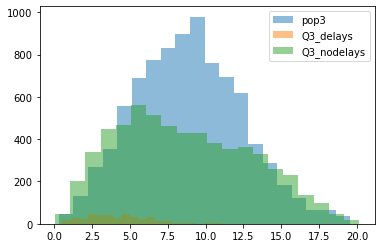

In [53]:
for model in ['pop3', 'Q3_delays', 'Q3_nodelays']:
    plt.hist(get_zs_for_model(model),bins=20,label=model,alpha=0.5);
plt.legend()

上图已经与文章中的图相同，注意上图的纵轴刻度要除以 50year
文章中的图为：![](https://cdn.jsdelivr.net/gh/yanyuechuixue/ImageHost/img/20211014113355.png)

# Mass distribution (Total redshifted mass)

In [55]:
event0.display()

	EclipticLatitude -0.3205036732051034 [Radian]
	EclipticLongitude 5.7973 [Radian]
	PolarAngleOfSpin1 0.14386 [Radian]
	PolarAngleOfSpin2 0.019326 [Radian]
	AzimuthalAngleOfSpin1 6.179965379581222 [Radian]
	AzimuthalAngleOfSpin2 3.2414510237777856 [Radian]
	Spin1 0.94658 [MassSquared]
	Spin2 0.46705 [MassSquared]
	Mass1 3176.6923659999998 [SolarMass]
	Mass2 3517.56407 [SolarMass]
	CoalescenceTime 9967056.356288606 [Second]
	PhaseAtCoalescence 1.9464692948727993 [Radian]
	InitialPolarAngleL 1.0103 [Radian]
	InitialAzimuthalAngleL 3.9308795477366223 [Radian]
	Approximant IMRPhenomD [ModelName]
	Cadence 10 [Seconds]
	Redshift 9.9394 [dimensionless]
	Distance 105.27054696077263 [Gpc]
	ObservationDuration 19934112.712577213 [Seconds]
	SourceType MBHB [name]



In [71]:
def get_redshiftedTotMasses_for_model(model):
    events = EventsUniverse(model=model,duration=49.9)
    RedshiftedTotalMasses = []
    for event_ in events:
        RedshiftedTotalMasses.append((event_.pars['Mass1']+event_.pars['Mass2'])*(1+event_.pars['Redshift']))

    RedshiftedTotalMasses = np.asarray(RedshiftedTotalMasses)
    return RedshiftedTotalMasses

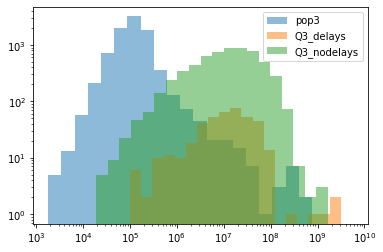

In [72]:
for model in ['pop3', 'Q3_delays', 'Q3_nodelays']:
    data = get_redshiftedTotMasses_for_model(model)
    hist, bins = np.histogram(data, bins=20)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

    plt.hist(data,bins=logbins,label=model,alpha=0.5,log=True);
plt.legend()
plt.xscale('log')

上图已经与文章中的图**接近**相同，注意上图的纵轴刻度要除以 50year
文章中的图为：![](https://cdn.jsdelivr.net/gh/yanyuechuixue/ImageHost/img/20211014114544.png)

# 这里注意上面两个图对于 Q3_delays 并不是完全相同的，下面的图没有超过 10^8 solarmass 的事件